# #Data Preprocessing.

Import the Libraries.
o	Importing the dataset.
o	Checking for Null Values.
o	Data Visualization.
o	Outlier Detection
o	Splitting Dependent and Independent variables
o-	Encoding
o	Feature Scaling.
o	Splitting Data into Train and Test.

In [1]:
#Import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Importing the dataset.
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [76]:
#Checking for Null Values.
df.isnull().any()


Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalanc

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

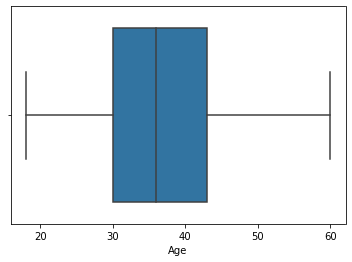

In [158]:
#outlier detection
sns.boxplot(df.Age)

In [49]:
#Splitting Dependent and Independent variables
x = df.iloc[:, :1].join(df.iloc[:, 2:])

In [50]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [51]:
y = df.iloc[:, 1]

In [52]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [53]:
#label encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#for attiration
x.Gender=le.fit_transform(x.Gender)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [54]:
type(y)

pandas.core.series.Series

In [19]:
type(x)

pandas.core.frame.DataFrame

In [56]:
y_mapping = {'No': 0, 'Yes': 1}
y = y.map(y_mapping)

In [57]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [58]:
print(x['Gender'])

0       0
1       1
2       1
3       0
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Gender, Length: 1470, dtype: int32


In [59]:
df.BusinessTravel.value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [23]:
df.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

In [24]:
df.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [60]:
BusinessTravel=pd.get_dummies(x["BusinessTravel"],drop_first=True)

In [61]:
BusinessTravel

,Travel_Frequently,Travel_Rarely
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
1465,True,False
1466,False,True
1467,False,True
1468,True,False


In [62]:
x=pd.concat([x,BusinessTravel],axis=1)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,0,8,0,1,6,4,0,5,False,True
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,1,10,3,3,10,7,1,7,True,False
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,0,7,3,3,0,0,0,0,False,True
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,0,8,3,3,8,7,3,0,True,False
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,1,6,3,3,2,2,2,2,False,True


In [63]:
x.drop(["BusinessTravel"],axis=1,inplace=True)
x.head()

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely
0,41,1102,Sales,1,2,Life Sciences,1,1,2,0,...,0,8,0,1,6,4,0,5,False,True
1,49,279,Research & Development,8,1,Life Sciences,1,2,3,1,...,1,10,3,3,10,7,1,7,True,False
2,37,1373,Research & Development,2,2,Other,1,4,4,1,...,0,7,3,3,0,0,0,0,False,True
3,33,1392,Research & Development,3,4,Life Sciences,1,5,4,0,...,0,8,3,3,8,7,3,0,True,False
4,27,591,Research & Development,2,1,Medical,1,7,1,1,...,1,6,3,3,2,2,2,2,False,True


In [64]:
Department=pd.get_dummies(x["Department"],drop_first=True)
Department

,Research & Development,Sales
0,False,True
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
1465,True,False
1466,True,False
1467,True,False
1468,False,True


In [65]:
x.drop(["Department"],axis=1,inplace=True)
x.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely
0,41,1102,1,2,Life Sciences,1,1,2,0,94,...,0,8,0,1,6,4,0,5,False,True
1,49,279,8,1,Life Sciences,1,2,3,1,61,...,1,10,3,3,10,7,1,7,True,False
2,37,1373,2,2,Other,1,4,4,1,92,...,0,7,3,3,0,0,0,0,False,True
3,33,1392,3,4,Life Sciences,1,5,4,0,56,...,0,8,3,3,8,7,3,0,True,False
4,27,591,2,1,Medical,1,7,1,1,40,...,1,6,3,3,2,2,2,2,False,True


In [66]:
#label encoding of EducationField
x_mapping = {'Life Sciences': 0, 'Medical': 1,'Marketing':2,'Technical Degree':3,'Other':4 }
x['EducationField'] = x['EducationField'].map(x_mapping)

In [67]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely
0,41,1102,1,2,0.0,1,1,2,0,94,...,0,8,0,1,6,4,0,5,False,True
1,49,279,8,1,0.0,1,2,3,1,61,...,1,10,3,3,10,7,1,7,True,False
2,37,1373,2,2,4.0,1,4,4,1,92,...,0,7,3,3,0,0,0,0,False,True
3,33,1392,3,4,0.0,1,5,4,0,56,...,0,8,3,3,8,7,3,0,True,False
4,27,591,2,1,1.0,1,7,1,1,40,...,1,6,3,3,2,2,2,2,False,True


In [77]:
df.MaritalStatus.value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [73]:
df.JobRole.value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [74]:
x_mapping = {'Sales Executive': 0, 'Research Scientist': 1,'Laboratory Technician':2,'Manufacturing Director':3,'Healthcare Representative':4,'Manager':5,'Sales Representative':6,'Research Director':7,'Human Resources':8 }
x['JobRole'] = x['JobRole'].map(x_mapping)

In [79]:
MaritalStatus=pd.get_dummies(x["MaritalStatus"],drop_first=True)
MaritalStatus

,Married,Single
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
1465,True,False
1466,True,False
1467,True,False
1468,True,False


In [81]:
x.drop(["MaritalStatus"],axis=1,inplace=True)
x.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely
0,41,1102,1,2,0.0,1,1,2,0,94,...,0,8,0,1,6,4,0,5,False,True
1,49,279,8,1,0.0,1,2,3,1,61,...,1,10,3,3,10,7,1,7,True,False
2,37,1373,2,2,4.0,1,4,4,1,92,...,0,7,3,3,0,0,0,0,False,True
3,33,1392,3,4,0.0,1,5,4,0,56,...,0,8,3,3,8,7,3,0,True,False
4,27,591,2,1,1.0,1,7,1,1,40,...,1,6,3,3,2,2,2,2,False,True


In [159]:
x.corr()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely
Age,1.000000,0.010661,-0.001686,0.208034,-0.034969,NaN,-0.010145,0.010146,-0.036311,0.024287,...,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.024743,0.028791
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.006272,NaN,-0.050990,0.018355,-0.011716,0.023381,...,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.011776,0.002078
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.008853,NaN,0.032916,-0.016075,-0.001851,0.031131,...,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.005081,-0.020116
Education,0.208034,-0.016806,0.021042,1.000000,0.023213,NaN,0.042070,-0.027128,-0.016547,0.016775,...,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.008292,0.004126
EducationField,-0.034969,-0.006272,0.008853,0.023213,1.000000,NaN,0.005669,0.062189,0.006345,-0.034812,...,-0.023310,-0.029160,0.007801,0.051393,-0.019247,-0.006474,-0.019074,-0.000105,-0.035668,0.041530
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,0.005669,NaN,1.000000,0.017621,0.022556,0.035179,...,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.007980,-0.007976
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.062189,NaN,0.017621,1.000000,0.000508,-0.049857,...,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.012624,0.008496
Gender,-0.036311,-0.011716,-0.001851,-0.016547,0.006345,NaN,0.022556,0.000508,1.000000,-0.000478,...,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599,-0.022015,-0.014682
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.034812,NaN,0.035179,-0.049857,-0.000478,1.000000,...,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.018819,0.027541


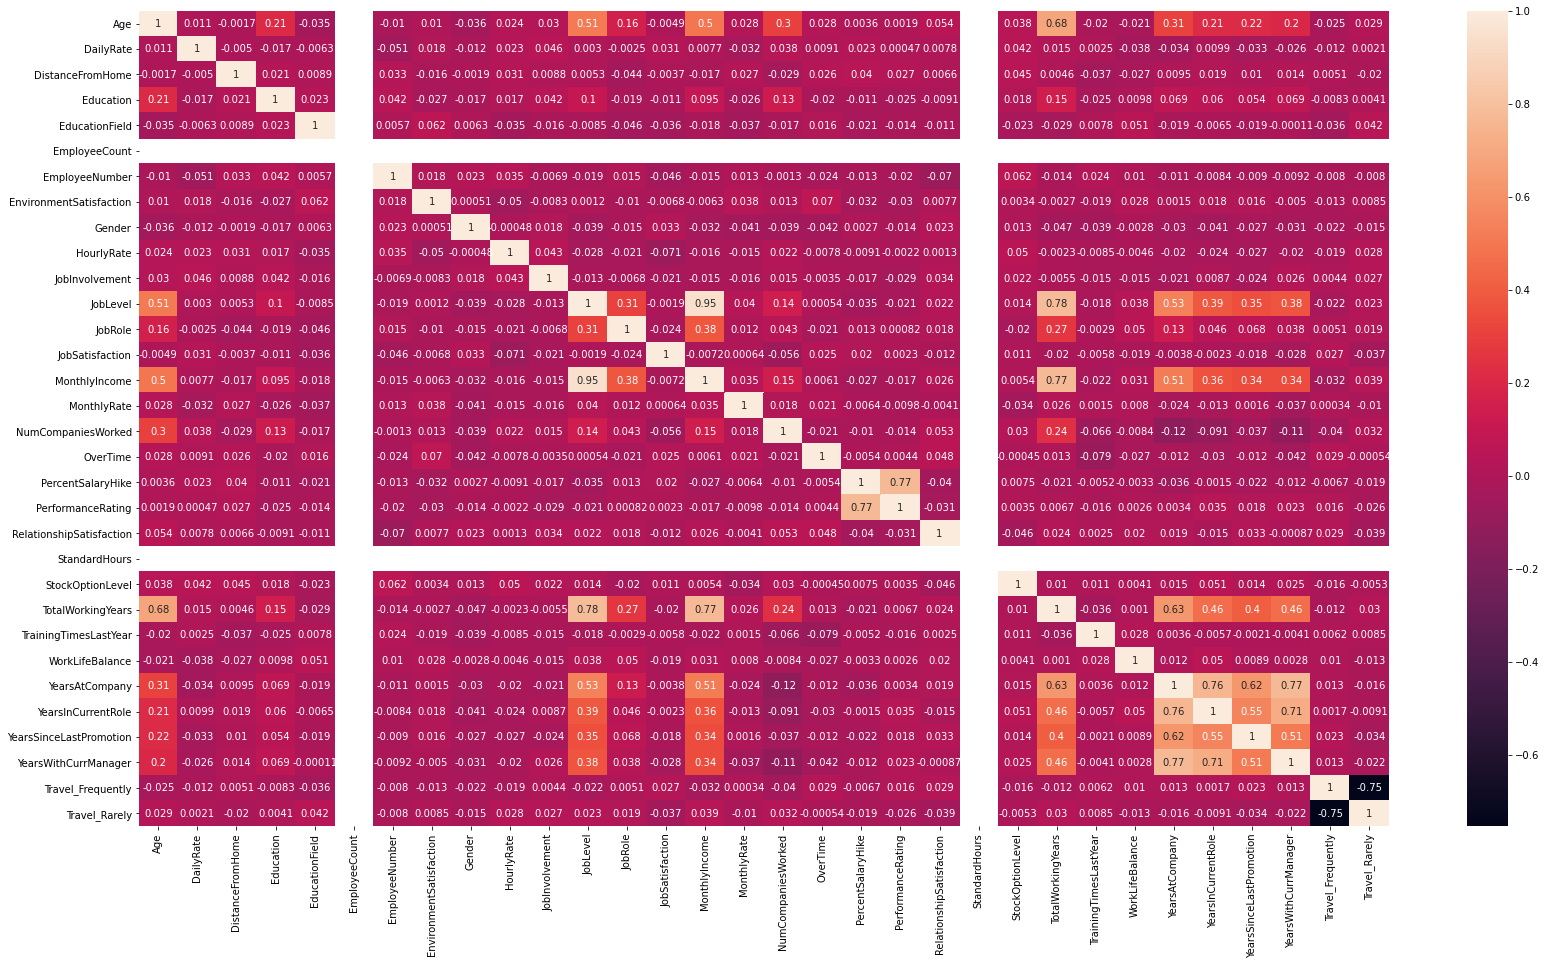

In [164]:
plt.figure(figsize=(28, 15))  # Adjust the size as needed (width, height)
sns.heatmap(x.corr(), annot=True)

plt.show()

In [83]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#for OverTime
x.OverTime=le.fit_transform(x.OverTime)
x.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely
0,41,1102,1,2,0.0,1,1,2,0,94,...,0,8,0,1,6,4,0,5,False,True
1,49,279,8,1,0.0,1,2,3,1,61,...,1,10,3,3,10,7,1,7,True,False
2,37,1373,2,2,4.0,1,4,4,1,92,...,0,7,3,3,0,0,0,0,False,True
3,33,1392,3,4,0.0,1,5,4,0,56,...,0,8,3,3,8,7,3,0,True,False
4,27,591,2,1,1.0,1,7,1,1,40,...,1,6,3,3,2,2,2,2,False,True


In [84]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)

In [85]:
x_scaled

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely
0,0.547619,0.715820,0.000000,0.25,0.00,0.0,0.000000,0.333333,0.0,0.914286,...,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.00,0.0,0.000484,0.666667,1.0,0.442857,...,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.00,0.0,0.001451,1.000000,1.0,0.885714,...,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.00,0.0,0.001935,1.000000,0.0,0.371429,...,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.25,0.0,0.002903,0.000000,1.0,0.142857,...,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.25,0.0,0.996613,0.666667,1.0,0.157143,...,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471,1.0,0.0
1466,0.500000,0.365784,0.178571,0.00,0.25,0.0,0.997097,1.000000,1.0,0.171429,...,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765,0.0,1.0
1467,0.214286,0.037938,0.107143,0.50,0.00,0.0,0.998065,0.333333,1.0,0.814286,...,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471,0.0,1.0
1468,0.738095,0.659270,0.035714,0.50,0.25,0.0,0.998549,1.000000,1.0,0.471429,...,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588,1.0,0.0


In [86]:
#Splitting Data into Train and Test.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)

In [87]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1176, 32), (294, 32), (1176,), (294,))

In [91]:
x_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Frequently,Travel_Rarely
1374,0.952381,0.360057,0.714286,0.50,0.00,0.0,0.937107,1.000000,0.0,0.600000,...,0.333333,0.725,0.333333,0.333333,0.025,0.000000,0.000000,0.000000,0.0,1.0
1092,0.642857,0.607015,0.964286,0.50,0.75,0.0,0.747460,1.000000,1.0,0.957143,...,0.333333,0.200,0.500000,0.666667,0.125,0.222222,0.000000,0.176471,0.0,1.0
768,0.523810,0.141732,0.892857,0.50,0.50,0.0,0.515239,0.666667,1.0,0.628571,...,0.333333,0.200,0.500000,0.333333,0.175,0.388889,0.466667,0.294118,0.0,1.0
569,0.428571,0.953472,0.250000,0.75,0.00,0.0,0.381229,0.000000,1.0,0.657143,...,0.000000,0.250,0.166667,0.666667,0.250,0.388889,0.000000,0.529412,0.0,0.0
911,0.166667,0.355762,0.821429,0.00,0.00,0.0,0.615385,0.666667,1.0,0.614286,...,0.000000,0.025,0.666667,0.666667,0.025,0.000000,0.066667,0.000000,1.0,0.0


# • Model Building
o	Import the model building Libraries
o	Initializing the model
o	Training and testing the model
o	Evaluation of Model
o	Save the Model

In [104]:
# Example to impute missing values with the mean of the column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test=imputer.fit_transform(x_test)


In [105]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [106]:
pred=model.predict(x_test)

In [107]:
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [108]:
y_test

442     0
1091    0
981     1
785     0
1332    1
       ..
1439    0
481     0
124     1
198     0
1229    0
Name: Attrition, Length: 294, dtype: int64

##Evaluation of classification model


In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [112]:
accuracy_score(y_test,pred)

0.8639455782312925

In [113]:
confusion_matrix(y_test,pred)


array([[238,   7],
       [ 33,  16]], dtype=int64)

In [114]:
pd.crosstab(y_test,pred)

col_0,0,1
Attrition,,
0,238,7
1,33,16


In [115]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       245
           1       0.70      0.33      0.44        49

    accuracy                           0.86       294
   macro avg       0.79      0.65      0.68       294
weighted avg       0.85      0.86      0.84       294



In [116]:
probability=model.predict_proba(x_test)[:,1]

In [117]:
probability

array([0.05440622, 0.16303012, 0.42279296, 0.10666154, 0.74332858,
       0.15545122, 0.4252304 , 0.02906147, 0.0024992 , 0.24368101,
       0.06496657, 0.2889456 , 0.05930783, 0.59260892, 0.26925259,
       0.04448878, 0.15474585, 0.160195  , 0.06758302, 0.31403588,
       0.17960611, 0.02637871, 0.05951302, 0.05849152, 0.53965349,
       0.43302858, 0.05257728, 0.03935184, 0.57951752, 0.05207501,
       0.01484466, 0.13982424, 0.14067767, 0.18495737, 0.11930312,
       0.08196644, 0.07537884, 0.0884986 , 0.02022067, 0.06431391,
       0.06842613, 0.0212399 , 0.02692471, 0.00962738, 0.03042196,
       0.58641583, 0.36387006, 0.00780747, 0.57907545, 0.50895822,
       0.25866101, 0.4285682 , 0.04730591, 0.25821117, 0.37515927,
       0.21947562, 0.03416965, 0.39222216, 0.08184248, 0.22292329,
       0.02992499, 0.18665635, 0.12395333, 0.09598779, 0.63853971,
       0.05000705, 0.30613376, 0.24456495, 0.07418001, 0.2287089 ,
       0.06795267, 0.25782561, 0.10988372, 0.04951764, 0.06080

In [118]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)

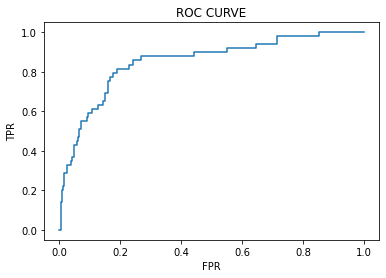

In [119]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

## using decision tree 

In [120]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [121]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [122]:
pred=dtc.predict(x_test)

In [123]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [124]:
y_test

442     0
1091    0
981     1
785     0
1332    1
       ..
1439    0
481     0
124     1
198     0
1229    0
Name: Attrition, Length: 294, dtype: int64

## Evaluation of classification model 

In [125]:
#Accuracy score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [126]:
accuracy_score(y_test,pred)

0.7687074829931972

In [127]:
confusion_matrix(y_test,pred)

array([[212,  33],
       [ 35,  14]], dtype=int64)

In [128]:
pd.crosstab(y_test,pred)

col_0,0,1
Attrition,,
0,212,33
1,35,14


In [129]:
probability=dtc.predict_proba(x_test)[:,1]

In [130]:
probability

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0.

In [131]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)

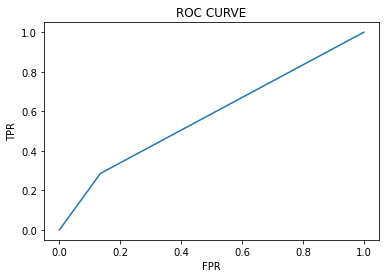

In [132]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

## Hyper parameter tuning 

[Text(444.0173760775862, 789.9187499999999, 'X[23] <= 0.038\ngini = 0.269\nsamples = 1176\nvalue = [988, 188]'),
 Text(83.60837438423646, 738.95625, 'X[0] <= 0.202\ngini = 0.5\nsamples = 78\nvalue = [39, 39]'),
 Text(36.65024630541872, 687.99375, 'X[9] <= 0.364\ngini = 0.439\nsamples = 40\nvalue = [13, 27]'),
 Text(18.32512315270936, 637.03125, 'X[2] <= 0.018\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(9.16256157635468, 586.06875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(27.48768472906404, 586.06875, 'gini = 0.0\nsamples = 12\nvalue = [0, 12]'),
 Text(54.97536945812808, 637.03125, 'X[30] <= 0.5\ngini = 0.494\nsamples = 27\nvalue = [12, 15]'),
 Text(45.812807881773395, 586.06875, 'X[1] <= 0.11\ngini = 0.496\nsamples = 22\nvalue = [12, 10]'),
 Text(36.65024630541872, 535.10625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(54.97536945812808, 535.10625, 'X[20] <= 0.5\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(36.65024630541872, 484.14375, 'X[6] <= 0.249\n

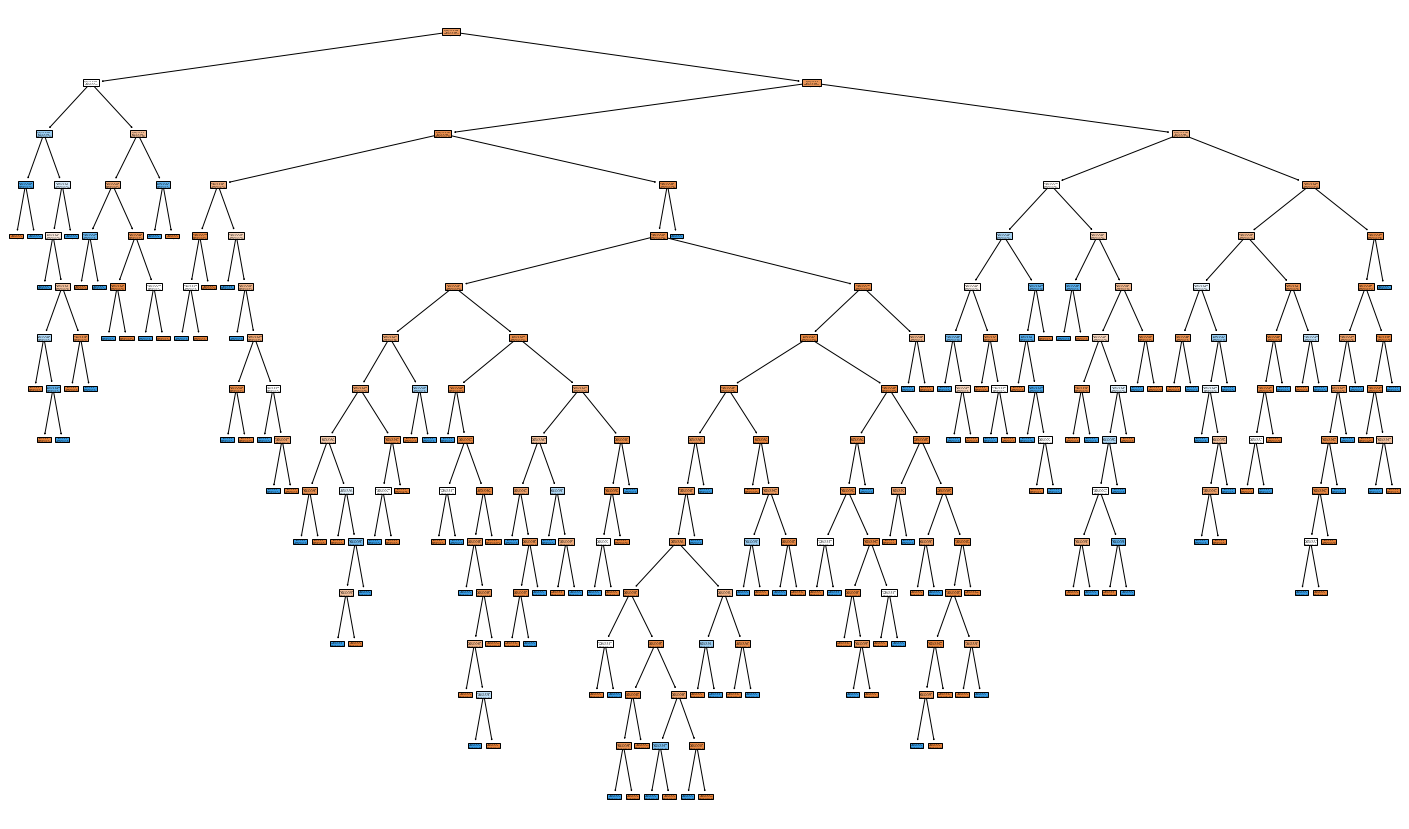

In [136]:
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(dtc,filled=True)

In [137]:
from sklearn.model_selection import GridSearchCV
parameter={
 'criterion':['gini','entropy'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [138]:
grid_search=GridSearchCV(estimator=dtc,param_grid=parameter,cv=5,scoring="accuracy")

In [139]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [140]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'random'}

In [141]:
dtc_cv=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=3,
 max_features='sqrt',
 splitter='best')
dtc_cv.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [142]:
pred=dtc_cv.predict(x_test)

In [143]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       245
           1       0.38      0.06      0.11        49

    accuracy                           0.83       294
   macro avg       0.61      0.52      0.50       294
weighted avg       0.76      0.83      0.77       294



## Random Forest 

In [149]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [150]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

In [151]:
rfc_cv= GridSearchCV(rfc,param_grid=forest_params,cv=10,scoring="accuracy")

In [152]:
rfc_cv.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [153]:
pred=rfc_cv.predict(x_test)

In [154]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       245
           1       0.88      0.14      0.25        49

    accuracy                           0.85       294
   macro avg       0.86      0.57      0.58       294
weighted avg       0.86      0.85      0.81       294

